#   <center>Week 2: Linear Regression frow scratch </center>

-----------

<strong>Objective</strong>: To build a <strong>univariate linear regression model</strong> that can predict profit given population size.

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for <strong>profits</strong> and <strong>populations</strong> from the cities.

You would like to use this data to help you select which city to expand to next.



---------------

# 1.  Load data

To load and plot the data, three python libraries(Numpy, Pandas and Matplotlib) should be used. The libraries are first imported in the codeblock below.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The file <strong>ex1data1.txt</strong> contains the dataset for our linear regression problem. The <strong>first column</strong> is the <strong>population</strong> of a city and the </strong>second column</strong> is the <strong>profit</strong> of a food truck in that city. A negative value for profit indicates a loss.

In [2]:
# Load dataset
column_names = ["Population","Profit"]  
data = pd.read_csv(r'C:\Users\HP\Downloads\Cohort4-master\Cohort4-master\beginner\machine-learning\week02\ex1data1.txt', names = column_names)

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


- Data shape

In [4]:
print('data shape: {}, column size: {}, row size: {}' \
      .format(data.shape, data.shape[0], data.shape[1]))

data shape: (97, 2), column size: 97, row size: 2


-  Display 5 random samples

In [5]:
data.sample(5)

,Population,Profit
27,10.9570,7.04670
81,5.1884,0.20421
75,6.5479,0.29678
84,6.5159,5.34360
79,5.1077,2.05760


- First 5 samples

In [6]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


- Last 5 samples

In [7]:
data.tail(5)

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


----------

# 2. Exploratory Data Analysis

In [8]:
#Data Summary
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [9]:
# Correlation 
corr = data.corr()
corr.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,1,0.837873
Profit,0.837873,1


In [10]:
# Covariance
cov = data.cov()
cov.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,14.976,17.8669
Profit,17.8669,30.363


-----

## 2.1. Visualization 

It is a good practice to visualize your data before building a model. The aim of data visualization is to give you an insight on the problem. We will be using <strong>matplotlib</strong>  and <strong>seaborn</strong> libracy for visuals.

- Boxplot

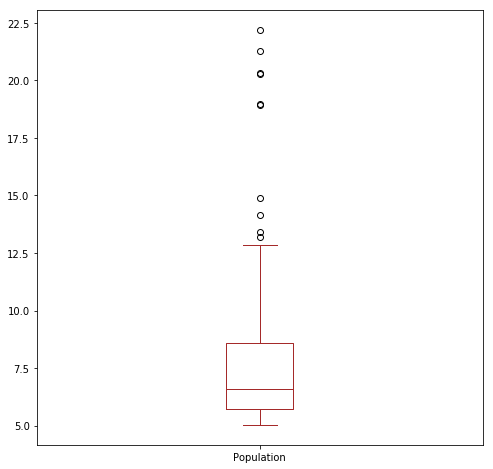

In [11]:
data.Population.plot(kind='box', figsize=(8,8), color='brown')

- Histogram

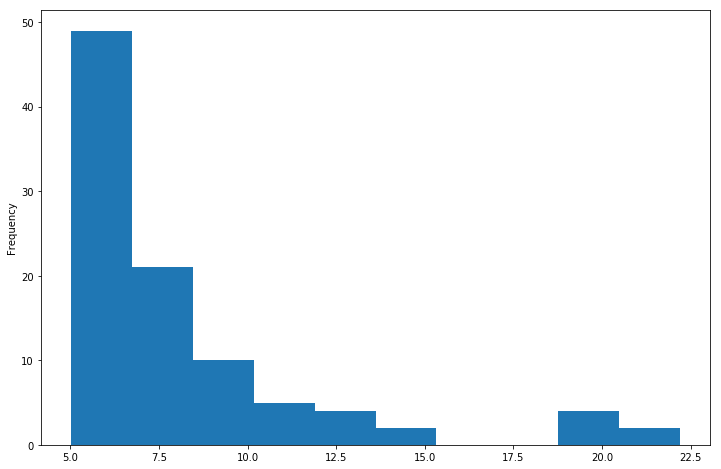

In [12]:
data.Population.plot(kind='hist', figsize=(12,8))

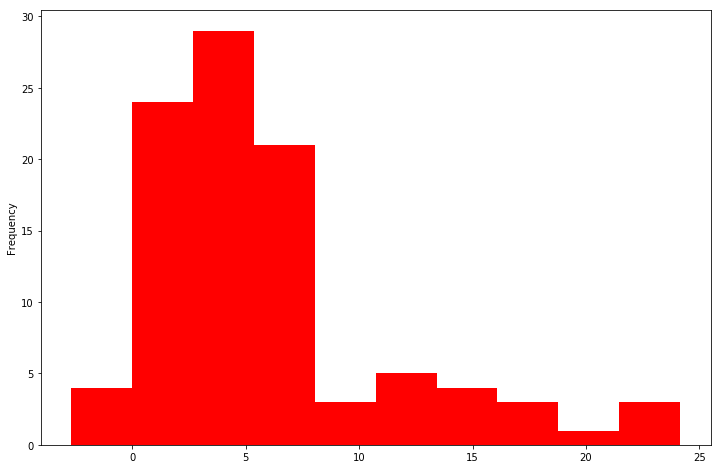

In [13]:
data.Profit.plot(kind='hist', figsize=(12,8), color='red')

- Scatterplot

Text(0,0.5,'Profit in $10,000s')

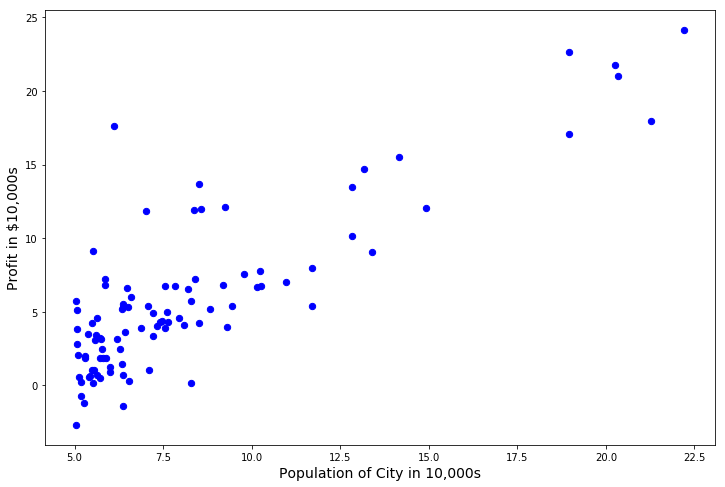

In [14]:
# scatterplot
data.plot(kind = 'scatter', x = 'Population', y = 'Profit',
          s= 40, color = 'blue', figsize=(12,8))

# labels
plt.xlabel('Population of City in 10,000s', fontsize = 14)
plt.ylabel('Profit in $10,000s', fontsize =14)

-----

# 3. Problem Formulation

From the exploratory data analysis we can observe there is a positive correlation between the two variables. This means that we can develop a model that will be able to make reasonable predictions

We have 97 training examples and one independent variable `x` on the first column and one dependent variable `y` on the second column

**Recall:**
- Our untrained model is given by: ![title](img/model.gif)
    
- Which you can also be written as ![title](img/model2.gif)

where:
- `x` is the input values
- `y` is the ground truth or actual values
- `theta` is the <strong>weight or learnable<strong> parameters  



In [15]:
# input values - xs and 1s
nrows = data.shape[0]
ncols = data.shape[1]

x = data.loc[:, 'Population'].values #converts to Numpy array
x = x.reshape(nrows, 1)  # Alternatively x.reshape(-1,1)

In [16]:
x.shape

(97, 1)

Because `x_0` is `1`, we want to create a `97 x 2` matrix that contains the input values on the first column and ones in the second column.

In [17]:
one_stack = np.ones((nrows,1))
x_stack = np.hstack((x, one_stack))

In [18]:
x_stack[:3]

array([[6.1101, 1.    ],
       [5.5277, 1.    ],
       [8.5186, 1.    ]])

In [19]:
# output variable
y = data.loc[:, 'Profit'].values # converts to Numpy array
y = y.reshape(nrows,1)

In [20]:
y.shape

(97, 1)

# 4. Model Building

Recall from the class, the process to training a linear regression model is as follow.

We want to find the appropriate value of `theta` that will give us a good estimate of a city's profit if lthe city's population is supplied.

To do this, 
- We want to start with a random value of `theta` to generate a hypothesis
![title](img/model3.gif)

- Then continually correct values of `theta` until the deviation of the hypothesis/prediction `h` from the ground-truth `y` is greatly reduced

**Note:** 
- Matrix multiplication was utilized for the calculation. 

In [39]:
def train(x,y):
    print_every = 50 
    iteration = 2500
    
    # Zero initialization of parameters 
    theta = [[0],[0]]
    
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(0, iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)
        
        # Display result every 50 iterations
        if i % print_every  == 0:
            print("Iteration: {}, Cost function: {} ".format(i, cost_function[i]))
    
    return theta, cost_function

But how do we check the error like we defined above?

Remember the error formular (cost function)? 
![title](img/model44.gif)

where:
- `m` is the number of training example
- `x` is the input data
- `h` is the hypothesis
- `y` is the prediction

The equation tries to find the square error between the ground truth and the prediction.



In [40]:
def cost(x, theta):
    m = nrows
    h = x @ theta
    return (1/(2 * m)) * np.sum(np.square(h - y))

Now that we are able to get a sense of the error, how do we update how weight (theta) such that is predicts better?

Like we discussed in class, gradient descent algorithim will be used for this purpose.

The general formular for gradient is given below:
![title](img/model6.gif)
which can be differentiated to give:
![title](img/model5.gif)
where
- alpha is the <strong>learning rate</strong>

ie: we continually update the weight(theta) by taking steps(alpha) for the derived gradient of the error until we have sufficiently minimized theta.

In [41]:
def update_weight(h, theta, x):
    m = nrows
    alpha = 0.001
    theta = theta - alpha * (1 / m * ( x.T @ (h - y)))
    return theta

- Now, lets pass in our data and train.

In [42]:
theta, cost_values = train(x_stack,y)

Iteration: 0, Cost function: 27.94761974682486 
Iteration: 50, Cost function: 5.893742954855769 
Iteration: 100, Cost function: 5.864367965267966 
Iteration: 150, Cost function: 5.839579893933509 
Iteration: 200, Cost function: 5.815235450570351 
Iteration: 250, Cost function: 5.791325946594822 
Iteration: 300, Cost function: 5.767843611211235 
Iteration: 350, Cost function: 5.744780812600596 
Iteration: 400, Cost function: 5.722130055294463 
Iteration: 450, Cost function: 5.699883977738863 
Iteration: 500, Cost function: 5.678035349901785 
Iteration: 550, Cost function: 5.656577070923389 
Iteration: 600, Cost function: 5.6355021668082035 
Iteration: 650, Cost function: 5.614803788158575 
Iteration: 700, Cost function: 5.594475207948589 
Iteration: 750, Cost function: 5.5745098193377585 
Iteration: 800, Cost function: 5.554901133523798 
Iteration: 850, Cost function: 5.53564277763375 
Iteration: 900, Cost function: 5.516728492652765 
Iteration: 950, Cost function: 5.498152131389927 
It

In [43]:
# Now, lets see our cost_values
cost_values

array([27.94761975, 24.47289937, 21.54601437, ...,  5.06157931,
        5.06136856,  5.0611579 ])

In [44]:
cost_values

array([27.94761975, 24.47289937, 21.54601437, ...,  5.06157931,
        5.06136856,  5.0611579 ])

In [45]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [ 0.93855117 -1.36263013]


In [46]:
theta.shape

(2, 1)

In [47]:
theta.ravel().shape # Alternatively theta.squeeze().shape

(2,)

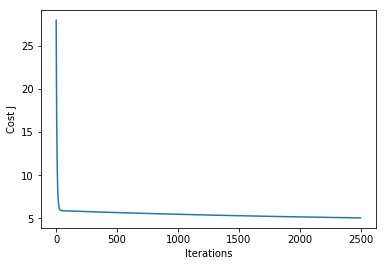

In [48]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

Notice that at the `1500th iteration`, the model doesnt really change anymore. You should actually stop the iteration at that time and save cost of processing

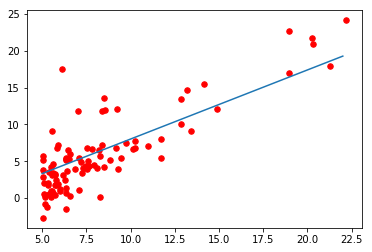

In [49]:
x_plot = np.arange(5,23)
y_plot = theta[0]*x_plot + theta[1]
# Plot gradient descent
plt.scatter(x[:,0], y, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

---------------

## 5. Prediction 

Here, I hard coded the learned weights in the model that we defined earlier.
![Title](img/model.gif)

In [37]:
def predict():
    input_ = float(input('Enter the population size(10,000): '))
    print("For a population of {}, the estimated profit is ${}".format(input_, ((input_ * 0.93855117) + -1.36263013)))
                                                                    

In [32]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [38]:
predict()

Enter the population size(10,000): 6.1101
For a population of 6.1101, the estimated profit is $4.372011373817


# Assignment


1. Use `scikit-learn` to develop a linear regression model using the same dataset in this practice and compare result.
2. Apply data normalization and compare the your solution with the  above result.
3. Rewrite the train function such that we pass   `'iteration', 'print_every' and 'alpha'` as arguments.


Assignment is due for submission on `26/09/2019`.

Summission link will be posted on the `SLACK CHANNEL/MAIL`?

------------------

## Credit

This exercise is adapted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning).